<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         January 2024, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 03 - Exercises

---

### Import data and modules

#### Import modules

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [134]:
df = pd.read_csv('./data/superstore.csv', sep=";", decimal=',')
print(df.shape)
df.head(5)

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [135]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Data preprocessing and visualization

#### Remove all columns except `Order Date` and `Sales`

In [136]:
# YOUR CODE
df = df[["Order Date", "Sales"]]


#### Convert  `Order Date`  column to datetime

In [137]:
# YOUR CODE
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


#### Sort DataFrame based on `Order Date` 

In [138]:
# YOUR CODE
df.sort_values(by='Order Date', inplace=True)
df

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
908,2017-12-30,52.776
907,2017-12-30,90.930
1296,2017-12-30,13.904


#### Grouping sales according to `Order Date`

We do this to have only one value per day (the sum).

In [139]:
# YOUR CODE
df = df.groupby("Order Date").sum().reset_index()

#### Set  `Order Date`  as index

In [140]:
# YOUR CODE
df.set_index("Order Date", inplace=True, drop=True)
df

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


#### Check for null values

In [141]:
# YOUR CODE
df.isna().any()

Sales    False
dtype: bool

#### Visualize the data

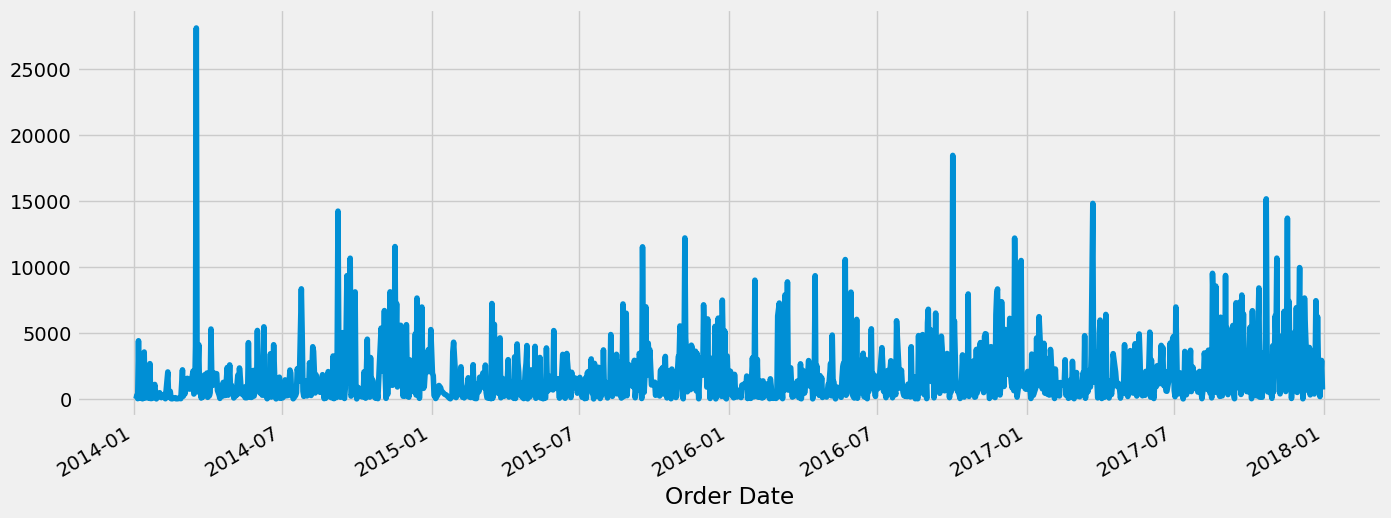

In [142]:
# YOUR CODE
fig = plt.figure(figsize=(15, 6))
df["Sales"].plot(kind="line");

#### Check Sales histogram

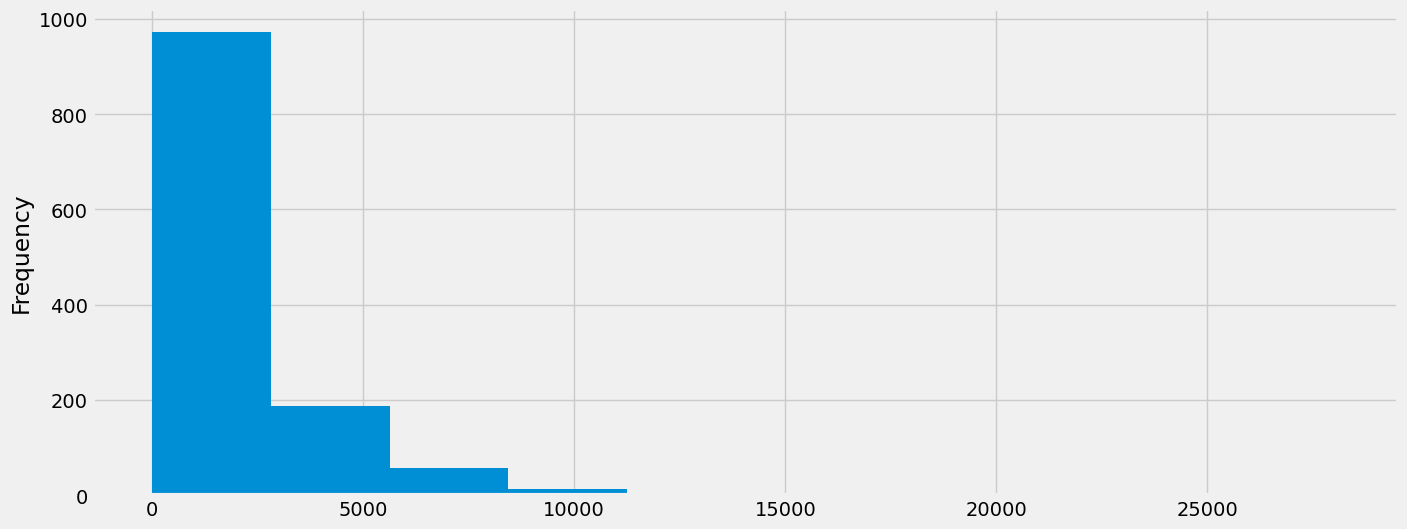

In [143]:
# YOUR CODE
fig = plt.figure(figsize=(15, 6))
df["Sales"].plot(kind="hist");

#### Can you find the average sales values per month? name your DataFrame as `df2`

In [144]:
# YOUR CODE
# df2 = df.groupby([df.index.month]).mean()
# df.groupby([df['Date_Time'].dt.date]).mean()
df2 = df.resample('M').mean()

#### Visualize `df2` DataFrame

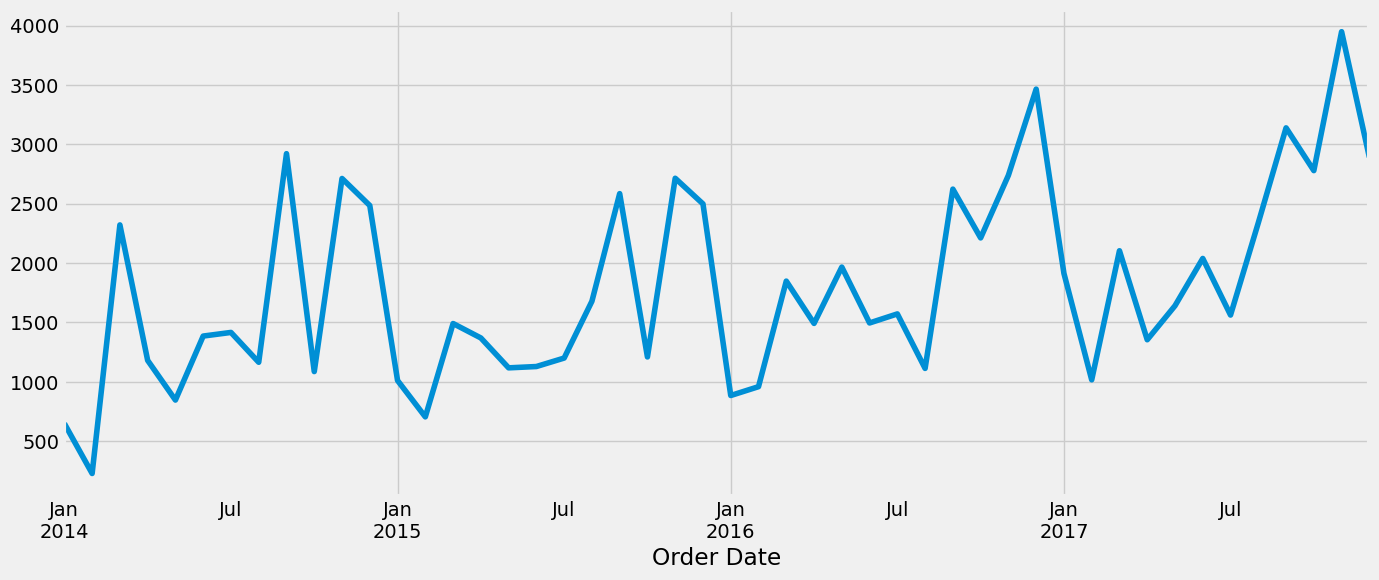

In [145]:
# YOUR CODE
fig = plt.figure(figsize=(15, 6))
df2["Sales"].plot(kind="line");

---

<div class="alert-danger">
    For the rest of this notebook, use the <b>df2</b> DataFrame.
</div>

### Time series decomposition

#### Decompose your time series into three distinct components (Trend, Seasonality and Noise)

Note: Use `additive` model.

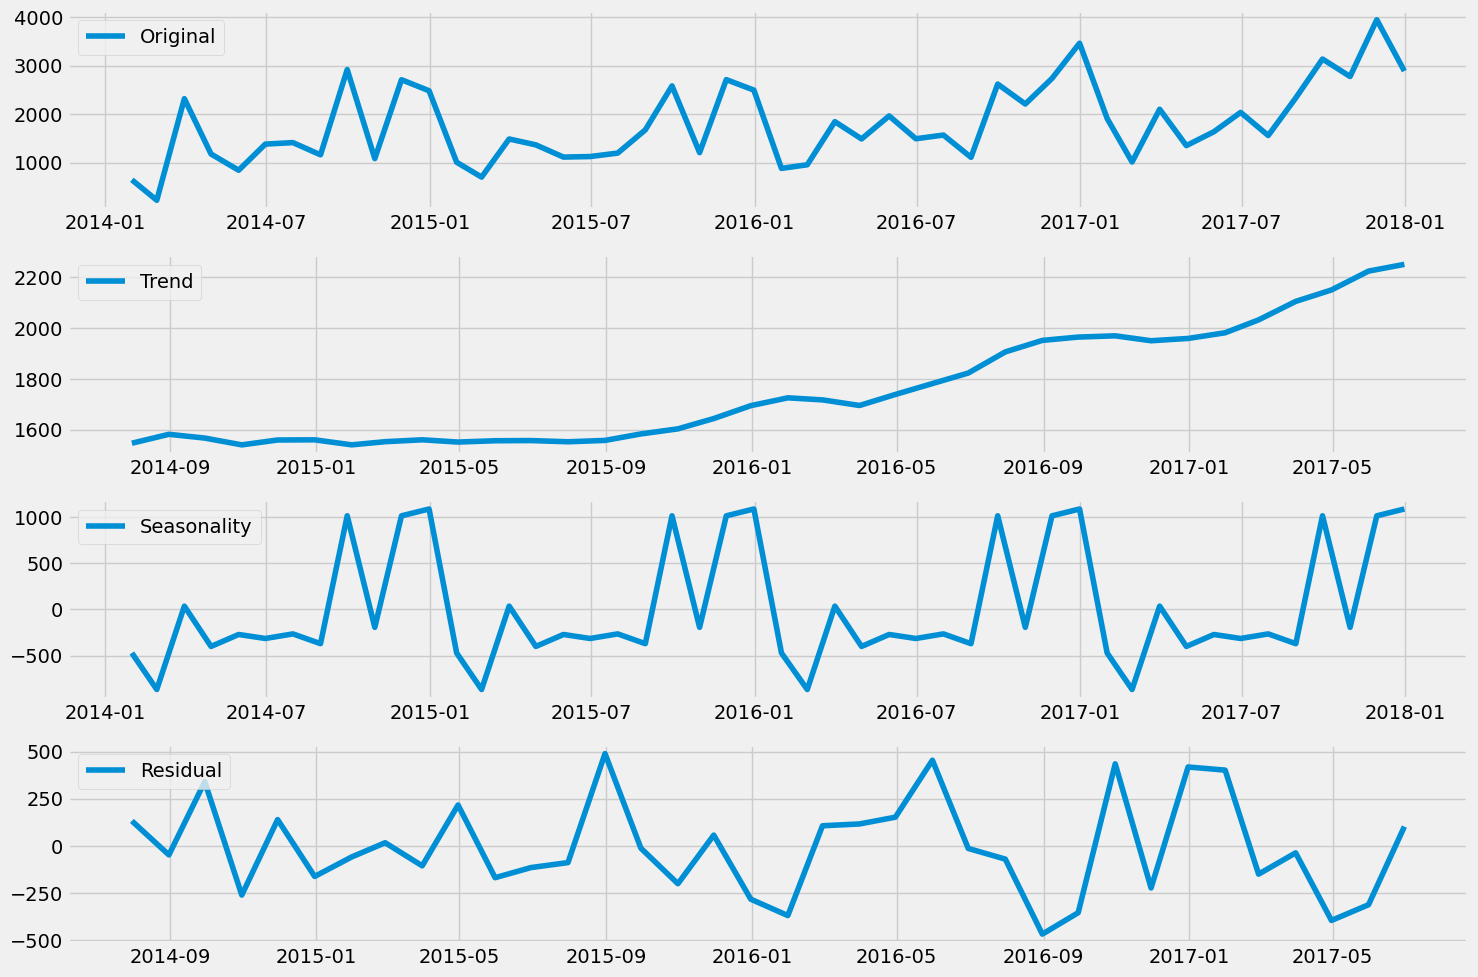

In [146]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4,1, figsize=(15,10))

axes[0].plot(df2, label='Original')
axes[0].legend(loc='upper left');
axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');
axes[2].plot(seasonal, label='Seasonality')
axes[2].legend(loc='upper left');
axes[3].plot(residual, label='Residual')
axes[3].legend(loc='upper left');

plt.tight_layout()

---

### Check for sationarity

#### Use Dickey-Fuller test

In [147]:
# YOUR CODE
from statsmodels.tsa.stattools import adfuller
print("pvalue of the test: ", adfuller(df2)[1])

pvalue of the test:  6.572451076431882e-05


#### Use Autocorrelation and Partial autocorrelation plots

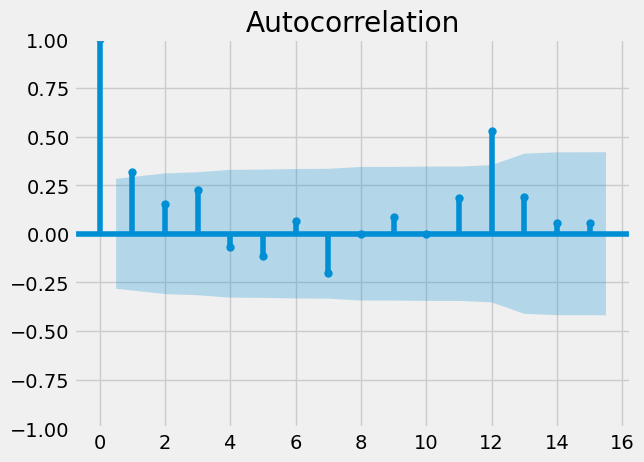

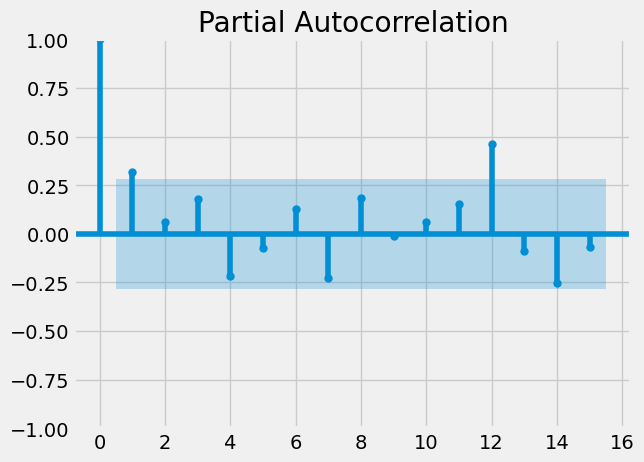

In [148]:
# YOUR CODE
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df2, lags = 15)
plot_pacf(df2, lags = 15)
plt.show()

---

### Making time series stationary

#### Apply difference transform with lag = 1

In [149]:
# YOUR CODE
df_lag_1 = df2 - df2.shift(1) 
df_lag_1.head(5)

,Sales
Order Date,
2014-01-31,NaN
2014-02-28,-421.136991
2014-03-31,2094.464108
2014-04-30,-1141.486000
2014-05-31,-334.391030


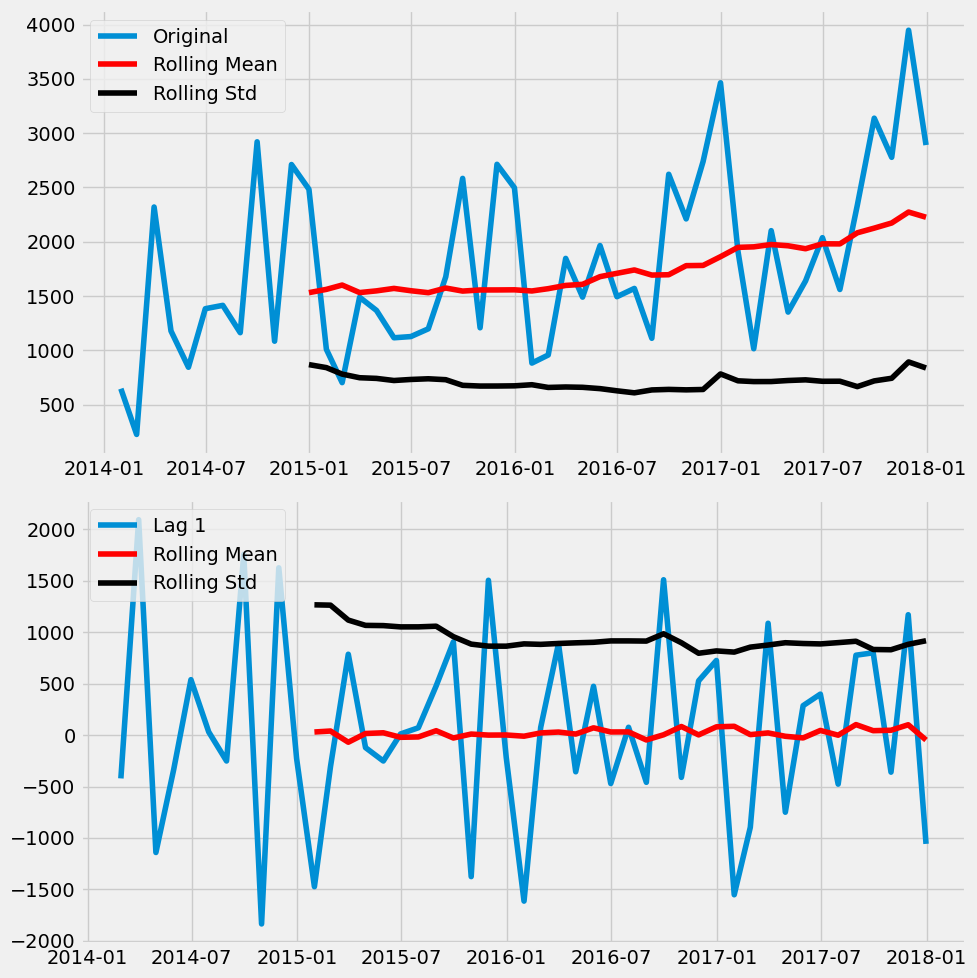

In [150]:
# YOUR CODE
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].plot(df2, label='Original')
axes[0].plot(df2.Sales.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[0].plot(df2.Sales.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[0].legend(loc='upper left');

axes[1].plot(df_lag_1, label='Lag 1')
axes[1].plot(df_lag_1.Sales.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[1].plot(df_lag_1.Sales.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[1].legend(loc='upper left');

plt.tight_layout()

---

### Time series forecasting

#### Split the data to train and test

In [151]:
split_date ='2016-12-31'
df_train = df2.loc[df2.index <= split_date]
df_test = df2.loc[df2.index > split_date]
print(f"{len(df_train)} months of training data and {len(df_test)} months of testing data ")

36 months of training data and 12 months of testing data 


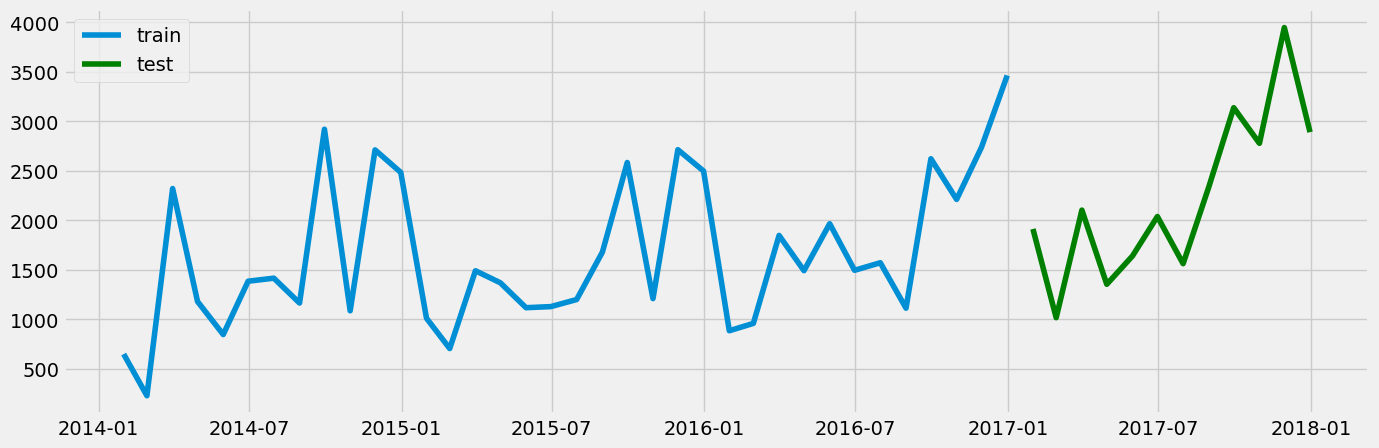

In [152]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.plot(df_train, label="train");
plt.plot(df_test, label="test", color="green");
plt.legend();

### <span style="color:steelblue;">  Seasonal Autoregressive Integrated Moving-Average (SARIMA)  </span>

Let's fit a `SARIMA` model on our data.

Use `order = (1, 1, 1)` and `seasonal_order = (1, 1, 0, 12)`.

In [153]:
# YOUR CODE
from statsmodels.tsa.statespace.sarimax import SARIMAX

pred_ = list()
for t in range(len(df_test.Sales)):
    temp_train = df2[:len(df_train)+t]
    model = SARIMAX(temp_train.Sales, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
sarima_forecast_df = pd.concat(pred_)

Plot forecast and evaluate it.

In [154]:
def plot_forecast(forecast_df,method_name):
    fig, ax = plt.subplots(1,1,figsize=(15, 5))
    plt.plot(df_train, label="train");
    plt.plot(df_test, label="test", color="green");
    plt.plot(forecast_df, label=method_name, color="red", linestyle=":");
    plt.legend();

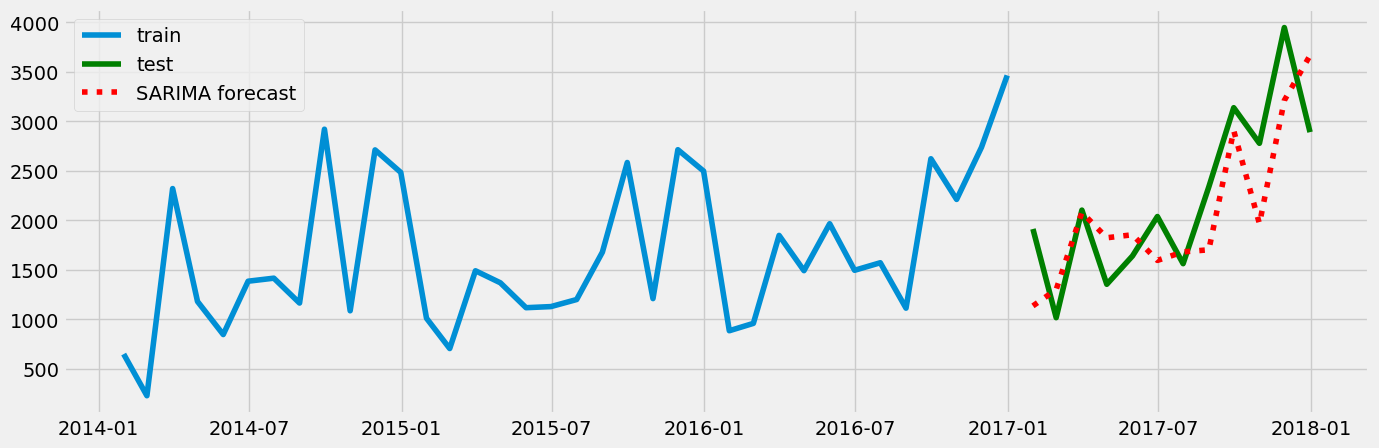

In [155]:
# YOUR CODE
plot_forecast(sarima_forecast_df, "SARIMA forecast")

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

results_all_models = pd.DataFrame(columns=["MSE","MAE","MAPE","R2"])

def evaluate_forecast(df_test, df_pred, method_name):
    y = df_test.values
    y_pred = df_pred.values
    results = {}
    results['MSE'] = mean_squared_error(y, y_pred)
    results['MAE'] = mean_absolute_error(y, y_pred)
    results['MAPE'] = mean_absolute_percentage_error(y, y_pred)
    results['R2'] = r2_score(y, y_pred)
    
    results_df = pd.DataFrame(data=results, index=[method_name])
    global results_all_models
    results_all_models = pd.concat([results_all_models, results_df])
    print( results_all_models.head(10) )

In [157]:
# YOUR CODE
evaluate_forecast(df_test, sarima_forecast_df, "SARIMA")

                  MSE         MAE      MAPE      R2
SARIMA  285648.312188  460.444541  0.213653  0.5561


How did we do?

---